In [148]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [149]:

homepage = requests.get("https://www.vlr.gg/matches/results")

soup = BeautifulSoup(homepage.content)

import warnings
warnings.filterwarnings('ignore')

In [150]:
pages = soup.select_one('div.action-container-pages')
total_number_of_pages = int(pages.find_all('a')[-1].get('href').split('=')[1])

total_number_of_pages = 5 


In [151]:
all_links = []

for i in range(1, total_number_of_pages + 1):
    all_links.append("https://www.vlr.gg/matches/results?page={i}".format(i=i))

all_links




['https://www.vlr.gg/matches/results?page=1',
 'https://www.vlr.gg/matches/results?page=2',
 'https://www.vlr.gg/matches/results?page=3',
 'https://www.vlr.gg/matches/results?page=4',
 'https://www.vlr.gg/matches/results?page=5']

In [152]:

columns =['Team1', 'Team2', 'Score1', 'Score2', 'LastPlayedOn', 'Date', 'WinningTeam', 'LosingTeam']
dataset = pd.DataFrame(columns=columns)


In [153]:
for link in all_links:
    webpage = None
    try:
        print(link)
        webpage = requests.get(link)
    except:
        print("Breaking")
        break
    soup = BeautifulSoup(webpage.content, features="lxml")
    element  = soup.select_one('div.col.mod-1')
    date = None
    while True:
        try:
            element = element.next_element
            if not element:
                break
            if element.name == 'div' and element.attrs:
                if "wf-label.mod-large" == '.'.join(element.attrs['class']):
                    date =  ','.join(element.contents[0].split(',')[1:])
                if "wf-card" == '.'.join(element.attrs['class']):
                    inline_matches = element.find_all('a') 
                    for inline_match in inline_matches:
                        team_div = inline_match.select('div.text-of')
                        teams = []
                        for ts in team_div[:2]:
                            teams.append(" ".join(ts.text.split()))
                        score = inline_match.select('div.match-item-vs-team-score')
                        scores = []
                        for ts in score[:2]:
                            scores.append(int(" ".join(ts.text.split())))
                        duration = inline_match.select_one('div.ml-eta.mod-completed').text
                        print()
                        if scores[0] < scores[1]:
                            winning_team = teams[1]
                            losing_team = teams[0]
                        else:
                            winning_team = teams[0]
                            losing_team = teams[1]
                        item = {'Team1': teams[0], 'Team2': teams[1], 'Score1': scores[0], 'Score2': scores[1], 'LastPlayedOn': duration, 'Date': ' '.join(date.split()[:3]), 'WinningTeam': winning_team, 'LosingTeam':losing_team }
                        dataset = dataset.append(item, ignore_index=True)
        except:
            break


https://www.vlr.gg/matches/results?page=1


















































https://www.vlr.gg/matches/results?page=2


















































https://www.vlr.gg/matches/results?page=3


















































https://www.vlr.gg/matches/results?page=4


















































https://www.vlr.gg/matches/results?page=5




















































In [154]:
frequency_winning = dataset.value_counts('WinningTeam').head(20)

names_winning = []
frequencies_winning = []
for key, i in frequency_winning.items():
    names_winning.append(key)
    frequencies_winning.append(i)
    



In [155]:
frequency_losing = dataset.value_counts('LosingTeam').head(20)

names_losing = []
frequencies_losing = []
for key, i in frequency_losing.items():
    names_losing.append(key)
    frequencies_losing.append(i)

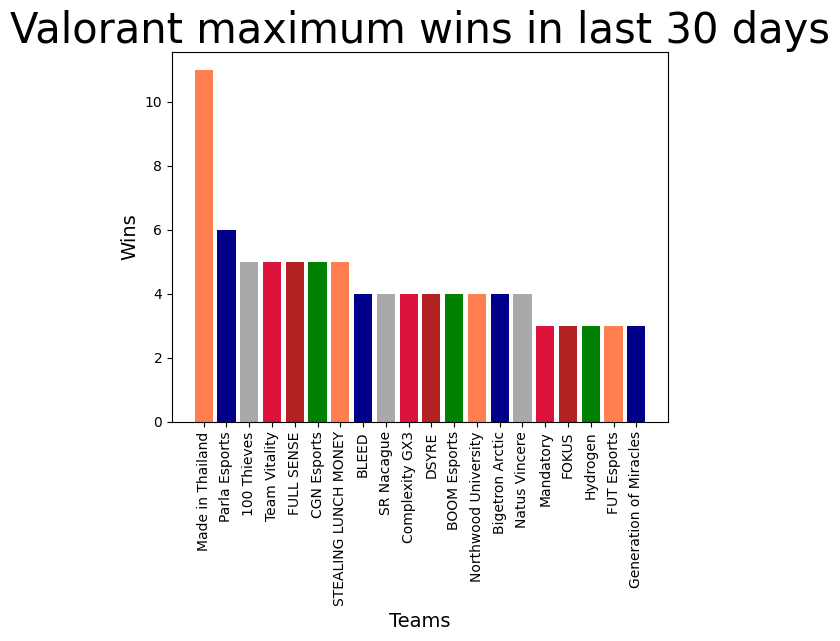

In [156]:
colors = ['coral','darkblue','darkgray','crimson','firebrick', 'green']
plt.xticks(rotation=90)
plt.title('Valorant maximum wins in last 30 days',fontsize=30) 
plt.xlabel("Teams",fontsize=14)
plt.ylabel("Wins",fontsize=14)
plt.bar(names_winning, frequencies_winning, color=colors)


plt.show()

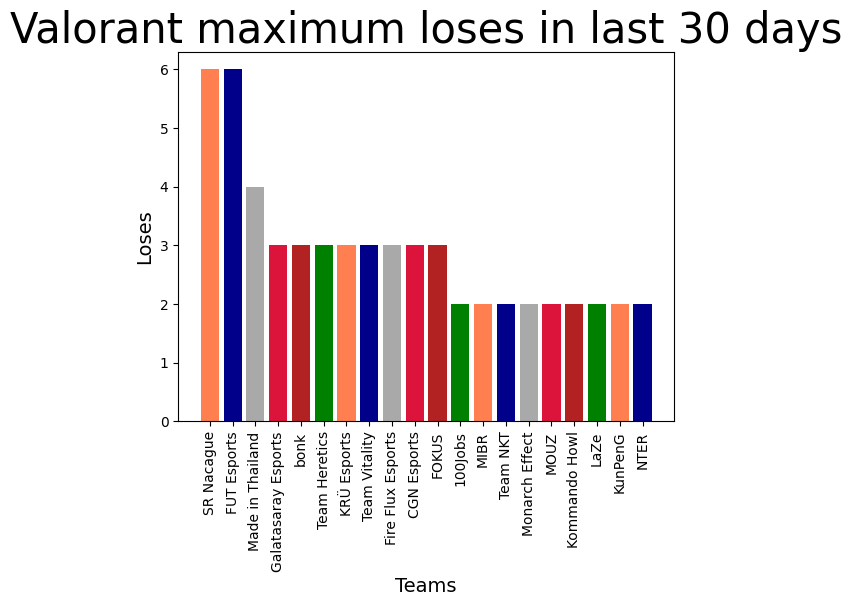

In [157]:
colors = ['coral','darkblue','darkgray','crimson','firebrick', 'green']
plt.xticks(rotation=90)
plt.title('Valorant maximum loses in last 30 days',fontsize=30) 
plt.xlabel("Teams",fontsize=14)
plt.ylabel("Loses",fontsize=14)
plt.bar(names_losing, frequencies_losing, color=colors)


plt.show()

In [158]:
dataset.head()

,Team1,Team2,Score1,Score2,LastPlayedOn,Date,WinningTeam,LosingTeam
0,Complexity GX3,Sanri-O's,2,0,5h 9m,"December 11, 2022",Complexity GX3,Sanri-O's
1,BCR,Spaghetti,2,0,5h 9m,"December 11, 2022",BCR,Spaghetti
2,SJSU Blue,UBC,3,0,5h 19m,"December 11, 2022",SJSU Blue,UBC
3,ODDIK,TotalePRO,2,0,6h 59m,"December 11, 2022",ODDIK,TotalePRO
4,SQUAD6,"Nada mal si nos tá, fazendo dinheiro...",2,1,6h 59m,"December 11, 2022",SQUAD6,"Nada mal si nos tá, fazendo dinheiro..."


In [159]:
frequency_date = dataset.value_counts('Date')
from collections import defaultdict
from datetime import datetime
dicto = defaultdict(lambda: 0)

for key, i in frequency_date.items():
    dicto[key] = i

dicto_date = sorted(dicto, key=lambda date: datetime.strptime(date, "%B %d, %Y"), reverse=True)
type(dicto_date)
matches_played_count = []
for curr_date in dicto_date:
    matches_played_count.append(dicto[curr_date])





<BarContainer object of 22 artists>

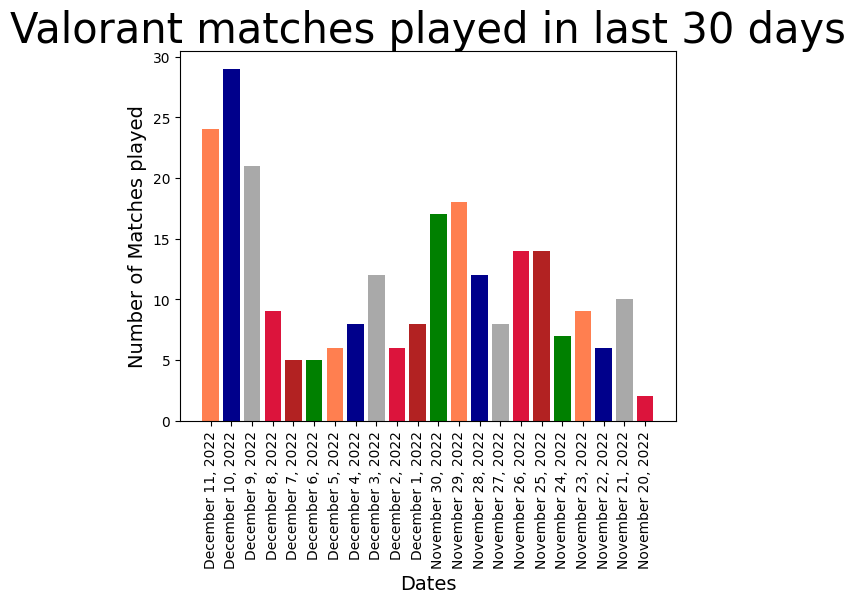

In [160]:
colors = ['coral','darkblue','darkgray','crimson','firebrick', 'green']
plt.xticks(rotation=90)
plt.title('Valorant matches played in last 30 days',fontsize=30) 
plt.xlabel("Dates",fontsize=14)
plt.ylabel("Number of Matches played",fontsize=14)
plt.bar(dicto_date, matches_played_count, color=colors)


In [161]:

from collections import defaultdict

def team_performance(name):
    frame = defaultdict(lambda: 0)
    streak = 0
    for i in dataset.itertuples():
        if i[7] == name:
            streak += 1
            frame[i[6]] = streak
        if i[8] == name:
            streak -= 1
            frame[i[6]] = streak
    frame_dates = sorted(frame, key=lambda date: datetime.strptime(date, "%B %d, %Y"), reverse=False)
    streak_list = []
    for date in frame_dates:
        streak_list.append(frame[date])
    return (frame_dates, streak_list[::-1])
print(team_performance('Made in Thailand'))





(['November 23, 2022', 'November 24, 2022', 'November 25, 2022', 'November 29, 2022', 'December 2, 2022', 'December 3, 2022', 'December 4, 2022', 'December 8, 2022', 'December 9, 2022', 'December 10, 2022', 'December 11, 2022'], [1, 1, 2, 3, 4, 5, 6, 7, 7, 6, 7])


In [162]:
def team_streak(name):
    frame = defaultdict(lambda: 0)
    streak = 0
    iswinning = False
    islosing = False
    for i in dataset.itertuples():
        if i[7] == name:
            streak += 1
            iswinning = True
            if islosing == True:
                islosing = False
                streak = 0
            frame[i[6]] = streak
        if i[8] == name:
            streak -= 1
            islosing = True
            if iswinning == True:
                iswinning = False
                streak = 0
            frame[i[6]] = streak
    frame_dates = sorted(frame, key=lambda date: datetime.strptime(date, "%B %d, %Y"), reverse=False)
    streak_list = []
    for date in frame_dates:
        streak_list.append(frame[date])
    return (frame_dates, streak_list[::-1])
print(team_streak('Made in Thailand'))

(['November 23, 2022', 'November 24, 2022', 'November 25, 2022', 'November 29, 2022', 'December 2, 2022', 'December 3, 2022', 'December 4, 2022', 'December 8, 2022', 'December 9, 2022', 'December 10, 2022', 'December 11, 2022'], [1, 0, 0, 1, 2, 3, 4, 0, 0, 0, 0])


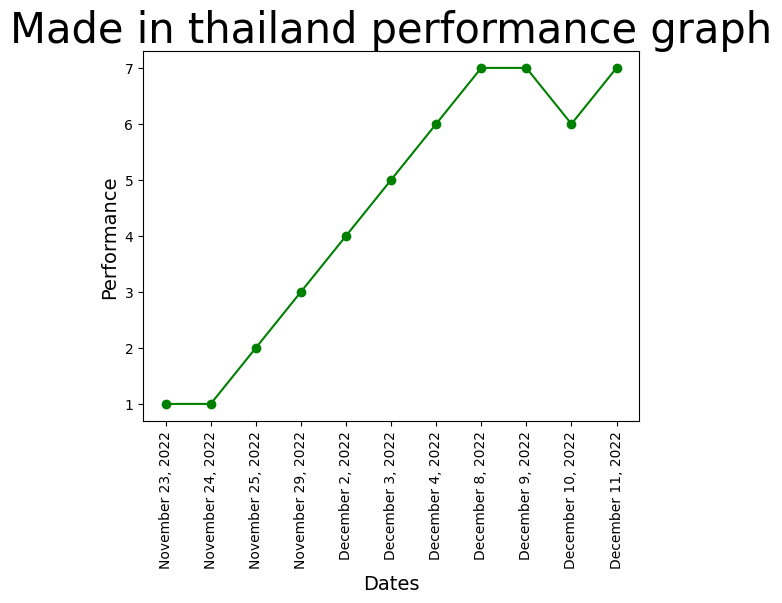

In [163]:
mith = team_performance('Made in Thailand')
plt.xticks(rotation=90)
plt.title('Made in thailand performance graph',fontsize=30) 
plt.xlabel("Dates",fontsize=14)
plt.ylabel("Performance",fontsize=14)
plt.plot(mith[0], mith[1], 'go-')

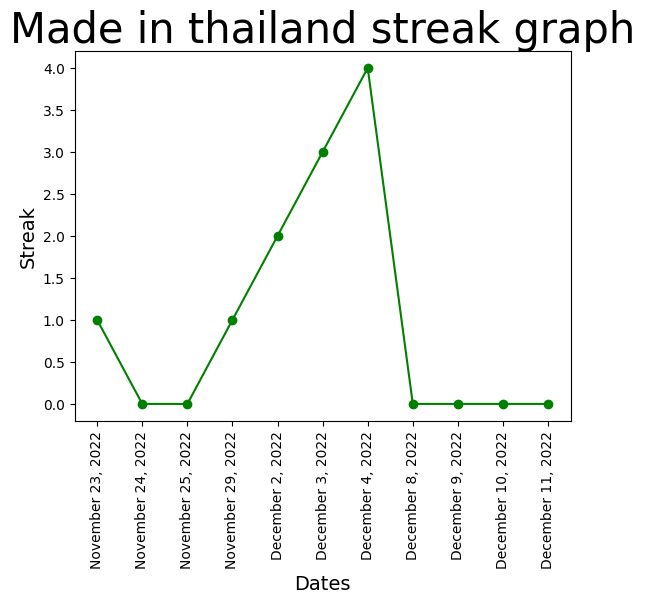

In [164]:
mith = team_streak('Made in Thailand')
plt.xticks(rotation=90)
plt.title('Made in thailand streak graph',fontsize=30) 
plt.xlabel("Dates",fontsize=14)
plt.ylabel("Streak",fontsize=14)
plt.plot(mith[0], mith[1], 'go-')

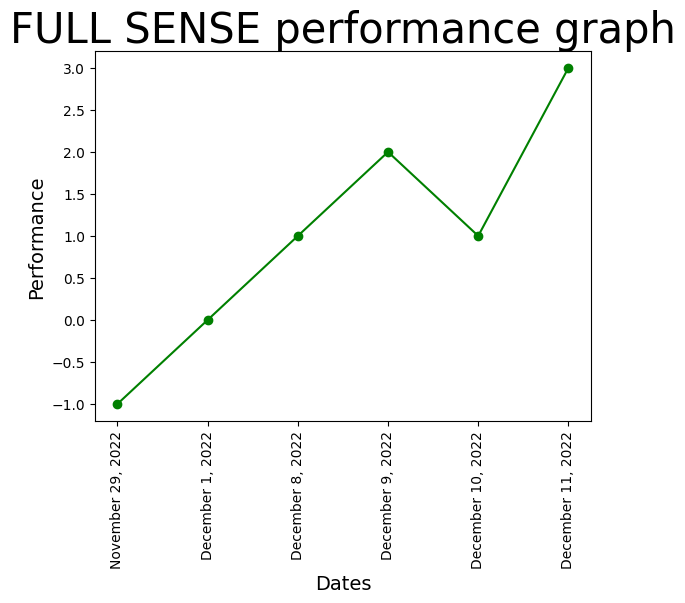

In [165]:
FULL_SENSE = team_performance('FULL SENSE')
plt.xticks(rotation=90)
plt.title('FULL SENSE performance graph',fontsize=30) 
plt.xlabel("Dates",fontsize=14)
plt.ylabel("Performance",fontsize=14)
plt.plot(FULL_SENSE[0], FULL_SENSE[1], 'go-')

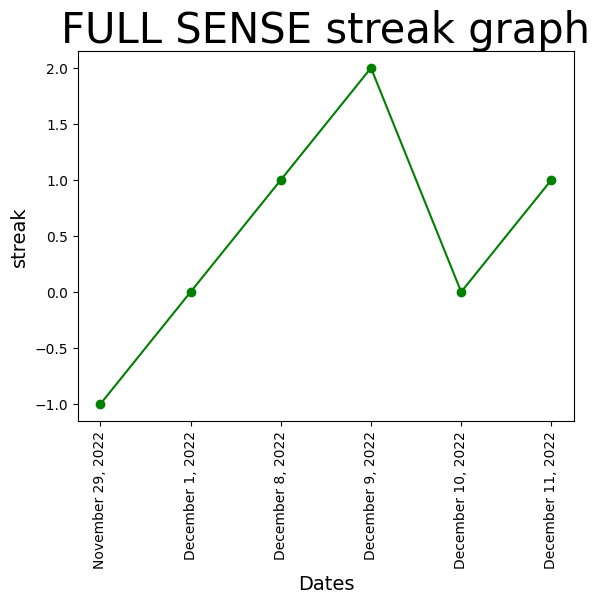

In [166]:
FULL_SENSE = team_streak('FULL SENSE')
plt.xticks(rotation=90)
plt.title('FULL SENSE streak graph',fontsize=30) 
plt.xlabel("Dates",fontsize=14)
plt.ylabel("streak",fontsize=14)
plt.plot(FULL_SENSE[0], FULL_SENSE[1], 'go-')

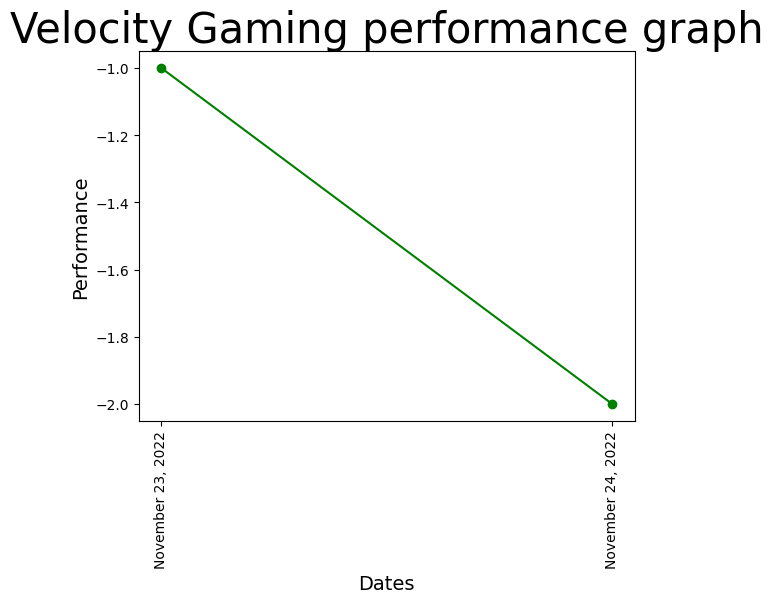

In [167]:
Velocity_Gaming = team_performance('Velocity Gaming')
plt.xticks(rotation=90)
plt.title('Velocity Gaming performance graph',fontsize=30) 
plt.xlabel("Dates",fontsize=14)
plt.ylabel("Performance",fontsize=14)
plt.plot(Velocity_Gaming[0], Velocity_Gaming[1], 'go-')

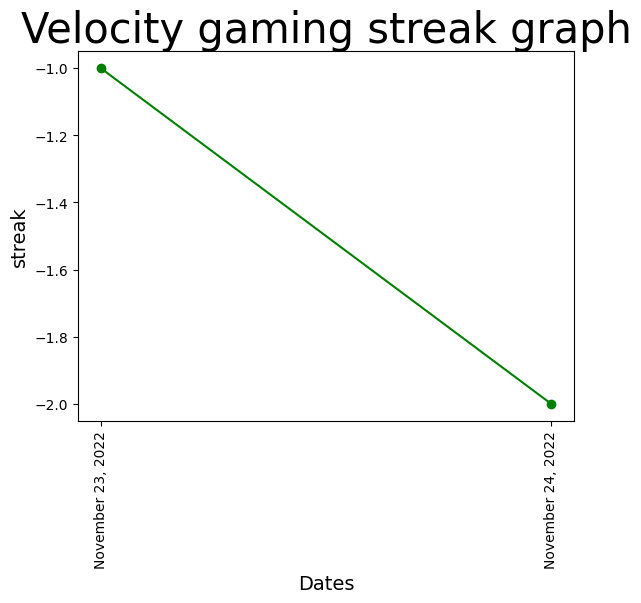

In [168]:
Velocity_Gaming = team_streak('Velocity Gaming')
plt.xticks(rotation=90)
plt.title('Velocity gaming streak graph',fontsize=30) 
plt.xlabel("Dates",fontsize=14)
plt.ylabel("streak",fontsize=14)
plt.plot(Velocity_Gaming[0], Velocity_Gaming[1], 'go-')